# Gradient-based loss regularisation

## Regression

In [2]:
import sys
sys.path.append("C:/Users/Bars/PycharmProjects/FedCore")

In [433]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from fedcore.repository.model_repository import AtomizedModel
from fedcore.architecture.dataset.datasets_from_source import DatasetFromNumpy
from fedcore.losses.regularization_losses import LaiMSE, LaiMAE
from fedcore.models.network_impl.hooks import Optimizers

In [208]:
np.random.seed(42)
torch.manual_seed(42)

In [209]:
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [210]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [211]:
X_tensor = DatasetFromNumpy(X, transform=transform).images.view(-1, 1, 1, 1)
y_tensor = DatasetFromNumpy(y, transform=transform).images

In [212]:
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

### MSE and Lai MSE Comparison

In [353]:
model = AtomizedModel.RESNET_MODELS.value.get('ResNet18')(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Sequential(nn.Linear(512, 100), nn.Linear(100, 20), nn.Linear(20, 1))
criterion = nn.MSELoss()
optimizer = Optimizers.sgd.value(model.parameters(), lr=0.001)

In [354]:
lv = []
lvv = []
num_epochs = 20
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        lv.append(loss.item())
        lvv.append(np.var(lv))

Epoch [1/20], Loss: 31.3958
Epoch [2/20], Loss: 15.3781
Epoch [3/20], Loss: 32.7345
Epoch [4/20], Loss: 12.7460
Epoch [5/20], Loss: 9.7535
Epoch [6/20], Loss: 4.5351
Epoch [7/20], Loss: 8.7588
Epoch [8/20], Loss: 20.2565
Epoch [9/20], Loss: 6.8881
Epoch [10/20], Loss: 28.3206
Epoch [11/20], Loss: 4.3341
Epoch [12/20], Loss: 29.4262
Epoch [13/20], Loss: 11.3172
Epoch [14/20], Loss: 43.5647
Epoch [15/20], Loss: 9.4277
Epoch [16/20], Loss: 5.4449
Epoch [17/20], Loss: 4.2642
Epoch [18/20], Loss: 3.4080
Epoch [19/20], Loss: 28.4009
Epoch [20/20], Loss: 8.2407


In [357]:
model = AtomizedModel.RESNET_MODELS.value.get('ResNet18')(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Sequential(nn.Linear(512, 100), nn.Linear(100, 20), nn.Linear(20, 1))
criterion = LaiMSE(factor=0.99)
optimizer = Optimizers.sgd.value(model.parameters(), lr=0.001)

In [358]:
ll = []
llv = []
num_epochs = 20
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        ll.append(loss.item())
        llv.append(np.var(ll))

Epoch [1/20], Loss: 7.1758
Epoch [2/20], Loss: 12.2916
Epoch [3/20], Loss: 6.2664
Epoch [4/20], Loss: 4.1710
Epoch [5/20], Loss: 3.8786
Epoch [6/20], Loss: 4.9898
Epoch [7/20], Loss: 4.7941
Epoch [8/20], Loss: 15.4753
Epoch [9/20], Loss: 7.4380
Epoch [10/20], Loss: 5.0668
Epoch [11/20], Loss: 7.5763
Epoch [12/20], Loss: 8.1109
Epoch [13/20], Loss: 6.4312
Epoch [14/20], Loss: 3.0154
Epoch [15/20], Loss: 5.2164
Epoch [16/20], Loss: 4.8126
Epoch [17/20], Loss: 2.4927
Epoch [18/20], Loss: 1.9288
Epoch [19/20], Loss: 3.2377
Epoch [20/20], Loss: 4.5782


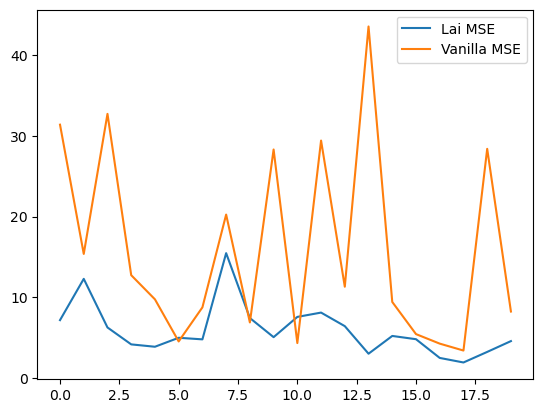

In [359]:
plt.plot(ll, label="Lai MSE")
plt.plot(lv, label="Vanilla MSE")
plt.legend()
plt.show()

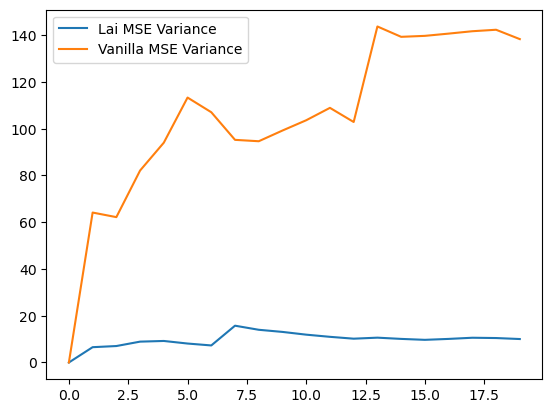

In [360]:
plt.plot(llv, label="Lai MSE Variance")
plt.plot(lvv, label="Vanilla MSE Variance")
plt.legend()
plt.show()

### MAE and Lai MAE Comparison

In [420]:
model = AtomizedModel.RESNET_MODELS.value.get('ResNet18')(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Sequential(nn.Linear(512, 100), nn.Linear(100, 20), nn.Linear(20, 1))
criterion = nn.L1Loss()
optimizer = Optimizers.sgd.value(model.parameters(), lr=0.002)

In [421]:
lv = []
lvv = []
num_epochs = 20
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        lv.append(loss.item())
        lvv.append(np.var(lv))

Epoch [1/20], Loss: 9.7994
Epoch [2/20], Loss: 8.8697
Epoch [3/20], Loss: 4.3200
Epoch [4/20], Loss: 4.1013
Epoch [5/20], Loss: 2.1896
Epoch [6/20], Loss: 4.8161
Epoch [7/20], Loss: 2.0988
Epoch [8/20], Loss: 3.1523
Epoch [9/20], Loss: 3.2345
Epoch [10/20], Loss: 2.3755
Epoch [11/20], Loss: 3.9206
Epoch [12/20], Loss: 2.7741
Epoch [13/20], Loss: 2.5077
Epoch [14/20], Loss: 2.9292
Epoch [15/20], Loss: 4.1548
Epoch [16/20], Loss: 2.3332
Epoch [17/20], Loss: 3.9288
Epoch [18/20], Loss: 1.8697
Epoch [19/20], Loss: 2.0054
Epoch [20/20], Loss: 3.0557


In [429]:
model = AtomizedModel.RESNET_MODELS.value.get('ResNet18')(pretrained=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Sequential(nn.Linear(512, 100), nn.Linear(100, 20), nn.Linear(20, 1))
criterion = LaiMAE(factor=0.99)
optimizer = Optimizers.sgd.value(model.parameters(), lr=0.002)

In [430]:
ll = []
llv = []
num_epochs = 20
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        ll.append(loss.item())
        llv.append(np.var(ll))

Epoch [1/20], Loss: 9.5435
Epoch [2/20], Loss: 7.0315
Epoch [3/20], Loss: 5.2666
Epoch [4/20], Loss: 2.9076
Epoch [5/20], Loss: 3.4827
Epoch [6/20], Loss: 2.4683
Epoch [7/20], Loss: 3.0191
Epoch [8/20], Loss: 3.5931
Epoch [9/20], Loss: 2.3368
Epoch [10/20], Loss: 2.3939
Epoch [11/20], Loss: 3.6662
Epoch [12/20], Loss: 2.5585
Epoch [13/20], Loss: 2.2664
Epoch [14/20], Loss: 1.6638
Epoch [15/20], Loss: 1.8631
Epoch [16/20], Loss: 2.1070
Epoch [17/20], Loss: 2.5404
Epoch [18/20], Loss: 1.4586
Epoch [19/20], Loss: 2.0683
Epoch [20/20], Loss: 2.0195


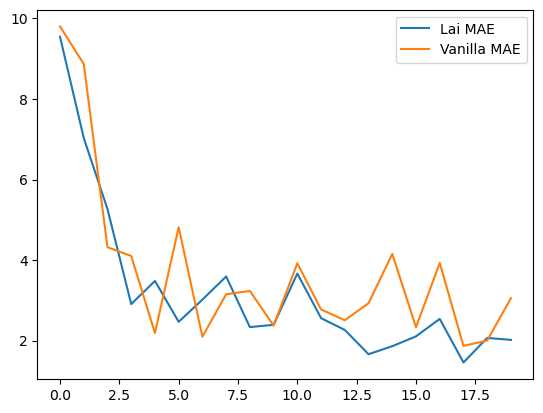

In [431]:
plt.plot(ll, label="Lai MAE")
plt.plot(lv, label="Vanilla MAE")
plt.legend()
plt.show()

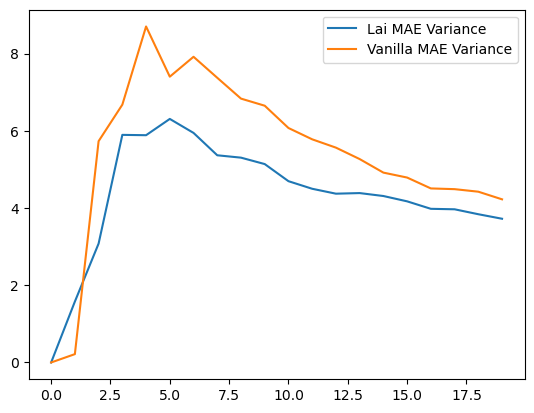

In [432]:
plt.plot(llv, label="Lai MAE Variance")
plt.plot(lvv, label="Vanilla MAE Variance")
plt.legend()
plt.show()

## Norm Loss: An efficient yet effective regularization method for deep neural networks

In [443]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader
from fedcore.architecture.comptutaional.devices import default_device
from fedcore.repository.constanst_repository import DEFAULT_TORCH_DATASET
from fedcore.repository.model_repository import AtomizedModel
from fedcore.losses.regularization_losses import NormLoss
from fedcore.models.network_impl.hooks import Optimizers

In [444]:
np.random.seed(42)
torch.manual_seed(42)

In [454]:
device = default_device()

2025-04-14 04:58:50,633 - Device <cuda:0> is selected


In [456]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = DEFAULT_TORCH_DATASET.get('CIFAR10')(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = DataLoader(
    trainset,
    batch_size=64,
    shuffle=True
)

Files already downloaded and verified


In [465]:
model = AtomizedModel.RESNET_MODELS.value.get('ResNet18')(pretrained=False).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Optimizers.adam.value(model.parameters(), lr=0.001)

In [466]:
cellst = []
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 199:
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss / 200:.3f}')
            cellst.append(running_loss)
            running_loss = 0.0

Epoch: 1, Batch: 200, Loss: 1.778
Epoch: 1, Batch: 400, Loss: 1.382
Epoch: 1, Batch: 600, Loss: 1.227
Epoch: 2, Batch: 200, Loss: 1.016
Epoch: 2, Batch: 400, Loss: 0.995
Epoch: 2, Batch: 600, Loss: 0.953
Epoch: 3, Batch: 200, Loss: 0.814
Epoch: 3, Batch: 400, Loss: 0.814
Epoch: 3, Batch: 600, Loss: 0.814
Epoch: 4, Batch: 200, Loss: 0.671
Epoch: 4, Batch: 400, Loss: 0.686
Epoch: 4, Batch: 600, Loss: 0.700
Epoch: 5, Batch: 200, Loss: 0.582
Epoch: 5, Batch: 400, Loss: 0.584
Epoch: 5, Batch: 600, Loss: 0.590


In [462]:
model = AtomizedModel.RESNET_MODELS.value.get('ResNet18')(pretrained=False).to(device)
criterion = nn.CrossEntropyLoss()
norm_loss = NormLoss()
optimizer = Optimizers.adam.value(model.parameters(), lr=0.001)

In [463]:
normllst = []
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device)) + norm_loss(model)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 199:
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss / 200:.3f}')
            normllst.append(running_loss)
            running_loss = 0.0

Epoch: 1, Batch: 200, Loss: 2.078
Epoch: 1, Batch: 400, Loss: 1.216
Epoch: 1, Batch: 600, Loss: 1.013
Epoch: 2, Batch: 200, Loss: 0.817
Epoch: 2, Batch: 400, Loss: 0.779
Epoch: 2, Batch: 600, Loss: 0.760
Epoch: 3, Batch: 200, Loss: 0.624
Epoch: 3, Batch: 400, Loss: 0.645
Epoch: 3, Batch: 600, Loss: 0.680
Epoch: 4, Batch: 200, Loss: 0.544
Epoch: 4, Batch: 400, Loss: 0.588
Epoch: 4, Batch: 600, Loss: 0.625
Epoch: 5, Batch: 200, Loss: 0.497
Epoch: 5, Batch: 400, Loss: 0.543
Epoch: 5, Batch: 600, Loss: 0.573


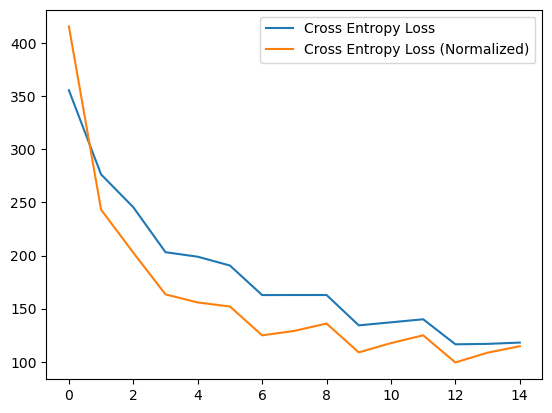

In [467]:
plt.plot(cellst, label="Cross Entropy Loss")
plt.plot(normllst, label="Cross Entropy Loss (Normalized)")
plt.legend()
plt.show()

# Regularization-based Pruning of Irrelevant Weights in Deep Neural Architectures

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
class CIFARNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def adaptive_regularization_loss(output, target, model, lambda_reg):
    main_loss = F.cross_entropy(output, target)

    grads = torch.autograd.grad(main_loss, model.parameters(), retain_graph=True)

    reg_loss = 0.0
    for param, grad in zip(model.parameters(), grads):
        if grad is not None:
            I = torch.exp(-torch.abs(grad))
            reg_loss += torch.sum(I * (param ** 2))

    return main_loss + lambda_reg * reg_loss

In [ ]:
def prune_weights(model, pruning_percentage):
    with torch.no_grad():
        all_weights = []
        for param in model.parameters():
            if len(param.shape) > 1:
                flat = param.abs().flatten()
                non_zero = flat[flat > 0]
                all_weights.append(non_zero)

        if not all_weights:
            return

        all_weights = torch.cat(all_weights)
        k = int(pruning_percentage * len(all_weights))

        if k == 0:
            return

        threshold = torch.kthvalue(all_weights, k).values

        for param in model.parameters():
            if len(param.shape) > 1:
                mask = param.abs() > threshold
                param.data *= mask.float()
                if param.grad is not None:
                    param.grad *= mask.float()

In [ ]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    return correct / total

In [ ]:
def train_model(model, val_accs, lambda_reg=0.01, eval_interval=200, lower_bound=0.75,
               prune_percent=0.2, decay_rate=0.95, epochs=2):

    optimizer = optim.Adam(model.parameters(), lr=0.002)
    best_acc = 0.0
    current_lambda = lambda_reg
    step = 0

    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = adaptive_regularization_loss(outputs, targets, model, current_lambda)
            loss.backward()
            optimizer.step()

            if step % eval_interval == 0:
                val_acc = evaluate(model, test_loader)
                val_accs.append(val_acc)
                print(f"Step {step}: Val Acc {val_acc:.4f}, Lambda {current_lambda:.4f}")

                if val_acc >= lower_bound:
                    print("Applying pruning...")
                    prune_weights(model, prune_percent)
                else:
                    current_lambda *= decay_rate

                if val_acc > best_acc:
                    best_acc = val_acc
                    torch.save(model.state_dict(), "best_model.pth")

            step += 1

In [ ]:
val_accs = []
model = CIFARNet().to(device)
train_model(model, val_accs)

Step 0: Val Acc 0.1137, Lambda 0.0100
Step 200: Val Acc 0.2951, Lambda 0.0095
Step 400: Val Acc 0.3461, Lambda 0.0090
Step 600: Val Acc 0.4067, Lambda 0.0086
Step 800: Val Acc 0.4036, Lambda 0.0081
Step 1000: Val Acc 0.4317, Lambda 0.0077
Step 1200: Val Acc 0.4096, Lambda 0.0074
Step 1400: Val Acc 0.4555, Lambda 0.0070
Step 1600: Val Acc 0.4570, Lambda 0.0066
Step 1800: Val Acc 0.4411, Lambda 0.0063
Step 2000: Val Acc 0.4529, Lambda 0.0060
Step 2200: Val Acc 0.4691, Lambda 0.0057
Step 2400: Val Acc 0.4765, Lambda 0.0054
Step 2600: Val Acc 0.4737, Lambda 0.0051
Step 2800: Val Acc 0.4916, Lambda 0.0049
Step 3000: Val Acc 0.4817, Lambda 0.0046


In [ ]:
val_accs_2 = []
model = CIFARNet().to(device)
train_model(model, val_accs_2, lambda_reg=0)

Step 0: Val Acc 0.1250, Lambda 0.0000
Step 200: Val Acc 0.3159, Lambda 0.0000
Step 400: Val Acc 0.3487, Lambda 0.0000
Step 600: Val Acc 0.3678, Lambda 0.0000
Step 800: Val Acc 0.3968, Lambda 0.0000
Step 1000: Val Acc 0.4093, Lambda 0.0000
Step 1200: Val Acc 0.4121, Lambda 0.0000
Step 1400: Val Acc 0.3980, Lambda 0.0000
Step 1600: Val Acc 0.4071, Lambda 0.0000
Step 1800: Val Acc 0.4160, Lambda 0.0000
Step 2000: Val Acc 0.4379, Lambda 0.0000
Step 2200: Val Acc 0.4236, Lambda 0.0000
Step 2400: Val Acc 0.4502, Lambda 0.0000
Step 2600: Val Acc 0.4425, Lambda 0.0000
Step 2800: Val Acc 0.4400, Lambda 0.0000
Step 3000: Val Acc 0.4526, Lambda 0.0000


In [ ]:
val_accs = []
model = CIFARNet().to(device)
train_model(model, val_accs)

Step 0: Val Acc 0.1000, Lambda 0.0100
Step 200: Val Acc 0.3477, Lambda 0.0095
Step 400: Val Acc 0.4177, Lambda 0.0090
Step 600: Val Acc 0.4335, Lambda 0.0086
Step 800: Val Acc 0.4250, Lambda 0.0081
Step 1000: Val Acc 0.4569, Lambda 0.0077
Step 1200: Val Acc 0.4664, Lambda 0.0074
Step 1400: Val Acc 0.4719, Lambda 0.0070
Step 1600: Val Acc 0.4753, Lambda 0.0066
Step 1800: Val Acc 0.4586, Lambda 0.0063
Step 2000: Val Acc 0.4878, Lambda 0.0060
Step 2200: Val Acc 0.5025, Lambda 0.0057
Step 2400: Val Acc 0.4879, Lambda 0.0054
Step 2600: Val Acc 0.5094, Lambda 0.0051
Step 2800: Val Acc 0.5091, Lambda 0.0049
Step 3000: Val Acc 0.4446, Lambda 0.0046
Step 3200: Val Acc 0.4982, Lambda 0.0044
Step 3400: Val Acc 0.5077, Lambda 0.0042
Step 3600: Val Acc 0.5102, Lambda 0.0040
Step 3800: Val Acc 0.5059, Lambda 0.0038


In [ ]:
val_accs_2 = []
model = CIFARNet().to(device)
train_model(model, val_accs_2, lambda_reg=0)

Step 0: Val Acc 0.1149, Lambda 0.0000
Step 200: Val Acc 0.2945, Lambda 0.0000
Step 400: Val Acc 0.3431, Lambda 0.0000
Step 600: Val Acc 0.3716, Lambda 0.0000
Step 800: Val Acc 0.3787, Lambda 0.0000
Step 1000: Val Acc 0.3820, Lambda 0.0000
Step 1200: Val Acc 0.3759, Lambda 0.0000
Step 1400: Val Acc 0.3879, Lambda 0.0000
Step 1600: Val Acc 0.4055, Lambda 0.0000
Step 1800: Val Acc 0.4119, Lambda 0.0000
Step 2000: Val Acc 0.3921, Lambda 0.0000
Step 2200: Val Acc 0.4004, Lambda 0.0000
Step 2400: Val Acc 0.4113, Lambda 0.0000
Step 2600: Val Acc 0.4241, Lambda 0.0000
Step 2800: Val Acc 0.4217, Lambda 0.0000
Step 3000: Val Acc 0.4144, Lambda 0.0000
Step 3200: Val Acc 0.4231, Lambda 0.0000
Step 3400: Val Acc 0.4333, Lambda 0.0000
Step 3600: Val Acc 0.4254, Lambda 0.0000
Step 3800: Val Acc 0.4379, Lambda 0.0000


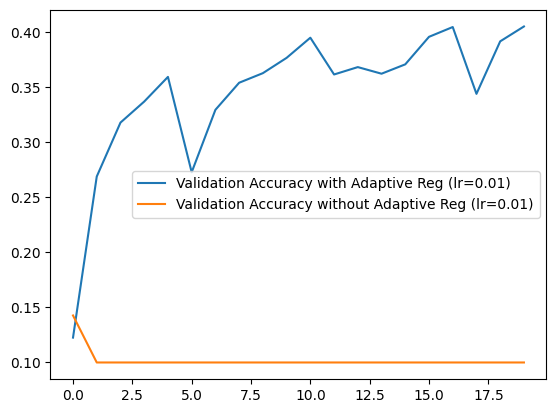

In [ ]:
plt.plot([0.1226, 0.2689, 0.3179, 0.3370, 0.3594, 0.2728, 0.3295, 0.3541, 0.3628, 0.3767, 0.3950, 0.3616, 0.3683, 0.3623, 0.3708, 0.3958, 0.4047, 0.3440, 0.3917, 0.4052], label="Validation Accuracy with Adaptive Reg (lr=0.01)")
plt.plot([0.1427, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000], label="Validation Accuracy without Adaptive Reg (lr=0.01)")
plt.legend()
plt.show()

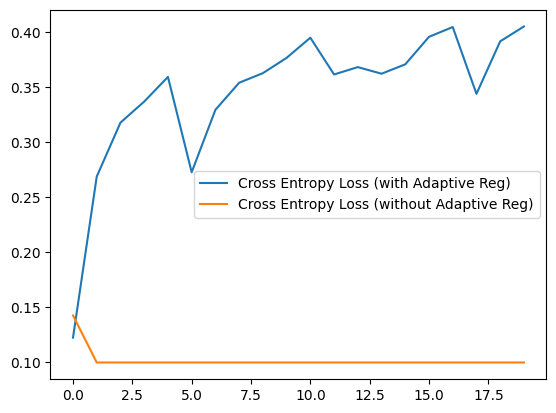

In [ ]:
plt.plot(val_accs, label="Cross Entropy Loss (with Adaptive Reg)")
plt.plot(val_accs_2, label="Cross Entropy Loss (without Adaptive Reg)")
plt.legend()
plt.show()

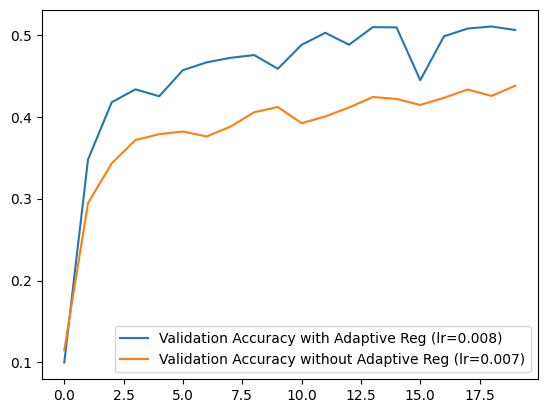

In [ ]:
plt.plot(val_accs, label="Validation Accuracy with Adaptive Reg (lr=0.008)")
plt.plot(val_accs_2, label="Validation Accuracy without Adaptive Reg (lr=0.007)")
plt.legend()
plt.show()

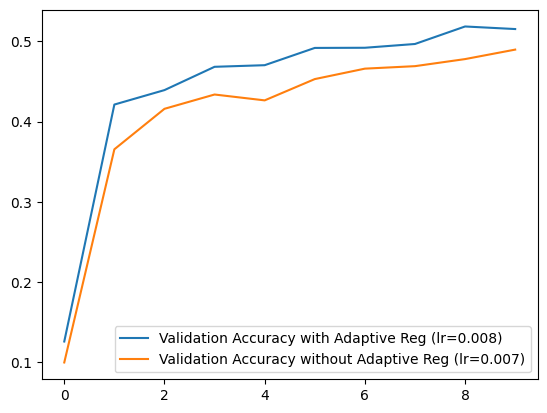

In [ ]:
plt.plot(val_accs, label="Validation Accuracy with Adaptive Reg (lr=0.008)")
plt.plot(val_accs_2, label="Validation Accuracy without Adaptive Reg (lr=0.007)")
plt.legend()
plt.show()

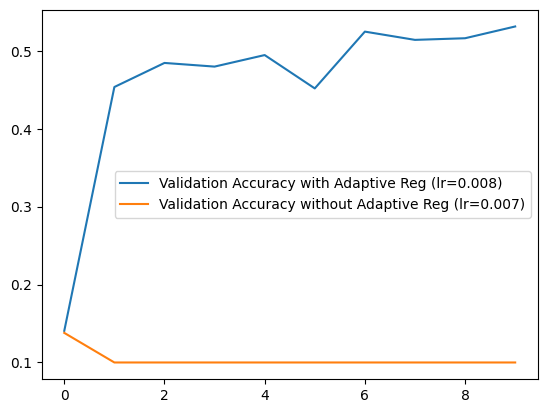

In [ ]:
plt.plot(val_accs, label="Validation Accuracy with Adaptive Reg (lr=0.008)")
plt.plot(val_accs_2, label="Validation Accuracy without Adaptive Reg (lr=0.007)")
plt.legend()
plt.show()

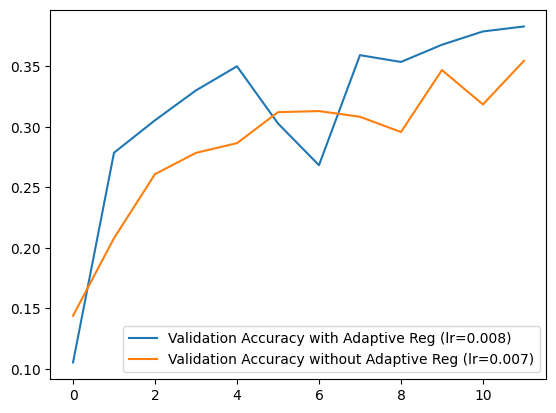

In [ ]:
plt.plot(val_accs, label="Validation Accuracy with Adaptive Reg (lr=0.008)")
plt.plot(val_accs_2, label="Validation Accuracy without Adaptive Reg (lr=0.007)")
plt.legend()
plt.show()

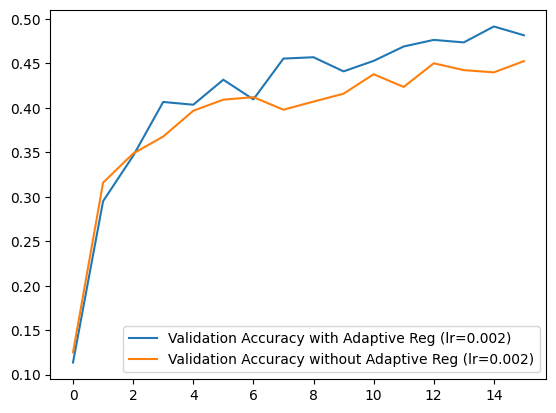

In [ ]:
plt.plot(val_accs, label="Validation Accuracy with Adaptive Reg (lr=0.002)")
plt.plot(val_accs_2, label="Validation Accuracy without Adaptive Reg (lr=0.002)")
plt.legend()
plt.show()

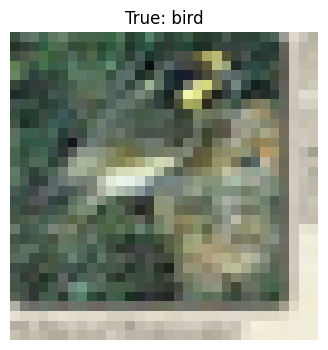


Predicted: bird
Confidence: 71.66%

Class probabilities:
airplane    : 0.26%
automobile  : 0.04%
bird        : 71.66%
cat         : 0.57%
deer        : 16.45%
dog         : 0.34%
frog        : 10.11%
horse       : 0.48%
ship        : 0.03%
truck       : 0.06%


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def denormalize(img):
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    img = img.numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

index = torch.randint(0, len(test_dataset), (1,)).item()
image, label = test_dataset[index]

plt.figure(figsize=(4, 4))
denorm_image = denormalize(image)
plt.imshow(denorm_image)
plt.title(f'True: {classes[label]}')
plt.axis('off')
plt.show()

input_image = image.unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(input_image)
    probabilities = F.softmax(output, dim=1)
    pred_prob, pred_class = torch.max(probabilities, 1)

print(f'\nPredicted: {classes[pred_class.item()]}')
print(f'Confidence: {pred_prob.item():.2%}')
print('\nClass probabilities:')
for i, prob in enumerate(probabilities.squeeze().cpu().numpy()):
    print(f'{classes[i]:12s}: {prob:.2%}')

In [ ]:
np.log([173158686720, 1304996.8125, 7241.453369, 12.4424400329589])

array([25.87747428, 14.08171116,  8.88757721,  2.52111321])

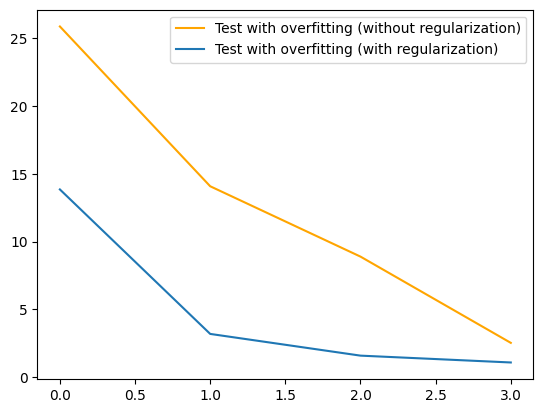

In [ ]:
plt.plot(np.log([173158686720, 1304996.8125, 7241.453369, 12.4424400329589]), label="Test with overfitting (without regularization)", color="orange")
plt.plot(np.log([1031940.34375, 24.07680988311, 4.84501791, 2.923684]), label="Test with overfitting (with regularization)")
plt.legend()
plt.show()

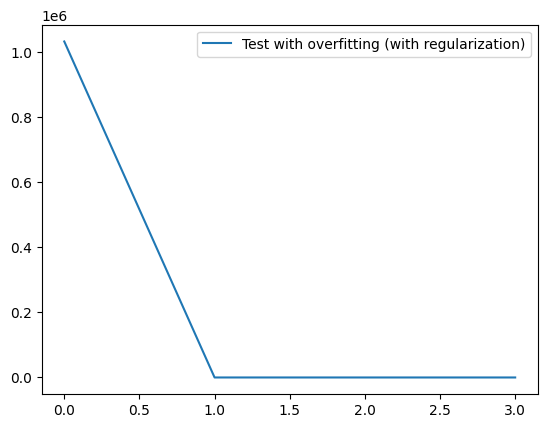

In [ ]:
plt.plot([1031940.34375, 24.07680988311, 4.84501791, 2.923684], label="Test with overfitting (with regularization)")
plt.legend()
plt.show()